<a href="https://colab.research.google.com/github/mellisairawan/OrbitFutureAcademy2/blob/main/Mellisa_Irawan_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

## **Neural Network**
Pada neural network terdapat 2 jenis model yaitu Sequential dan Functional. *Sequential model* bekerja dengan menambahkan lapisan ke model satu per satu secara linier dari input ke output, sedangkan *Functional model* secara eksplisit menghubungkan output dari satu lapisan ke input dari lapisan lain.

In [ ]:
# Sequential model:
# Menerima 8 input
# Memiliki 1 hidden layer dengan 10 neuron
# Memiliki 1 output layer dengan 1 neuron

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model
model1 = Sequential()
model1.add(Dense(10, input_shape=(8,)))
model1.add(Dense(1))


# Functional model:
# Menerima 8 input
# Memiliki 1 hidden layer dengan 10 neuron
# Memiliki 1 output layer dengan 1 neuron

from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)

# define the model
model2 = Model(inputs=x_in, outputs=x_out)

### **Membangun model Neural Network**
Pada kali ini akan dibuat model Neural Network untuk mengklasifikasi bunga Iris berdasarkan ukuran kelopaknya.

In [ ]:
import pandas as pd
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load dataset
path = 'https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/Data_Set/Iris.csv?token=AUVQBXBOT347RDG2ZV65X2TBYWBRM'
df = read_csv(path)

df #melihat dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# split data 
X, y = df.values[:, :-1], df.values[:, -1]
# ubah tipe data menjadi float32
X = X.astype('float32')

# encode string menjadi integer
y = LabelEncoder().fit_transform(y)

# split dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]

# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', ))
model.add(Dense(3, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}]')

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(120, 4) (30, 4) (120,) (30,)
Test Accuracy: 0.967]
Predicted: [[0.97630143 0.249246   0.0405269 ]] (class=0)


In [ ]:
# Deskripsi model yang dibuat
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 3)                 27        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


## **Convolutional Neural Network (CNN)**
Salah satu jenis neural network yang biasa digunakan pada data gambar untuk mendeteksi dan mengenali objek. CNN memanfaatkan proses konvolusi dengan menggerakkan sebuah kernel konvolusi berukuran tertentu ke sebuah gambar. Komputer mendapatkan informasi representatif baru dari hasil perkalian bagian gambar tersebut dengan filter yang digunakan.

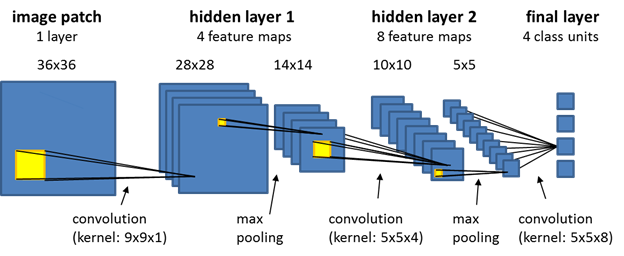

### **Membuat Fully-Connected Image Classifier**
Akan dibuat fully-connected neural network untuk melakukan image classification bunga dandelion dan rumput. Akan digunakan framework Deep Learning TensorFlow untuk membuat model ini.

In [ ]:
# Import Image Dataset: Train Dataset
!wget --no-check-certificate \
     https://github.com/mellisairawan/OrbitFutureAcademy2/blob/main/Data_Set/train.zip?raw=truee \
    -O /content/train.zip
   

--2021-12-24 08:54:50--  https://github.com/mellisairawan/OrbitFutureAcademy2/blob/main/Data_Set/train.zip?raw=truee
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mellisairawan/OrbitFutureAcademy2/raw/main/Data_Set/train.zip [following]
--2021-12-24 08:54:50--  https://github.com/mellisairawan/OrbitFutureAcademy2/raw/main/Data_Set/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/Data_Set/train.zip [following]
--2021-12-24 08:54:51--  https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/Data_Set/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

In [ ]:
# Import Image Datset: Test Dataset
!wget --no-check-certificate \
    https://github.com/mellisairawan/OrbitFutureAcademy2/blob/main/valid.zip?raw=true \
    -O /content/train.zip


--2021-12-24 08:55:25--  https://github.com/mellisairawan/OrbitFutureAcademy2/blob/main/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mellisairawan/OrbitFutureAcademy2/raw/main/valid.zip [following]
--2021-12-24 08:55:25--  https://github.com/mellisairawan/OrbitFutureAcademy2/raw/main/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/valid.zip [following]
--2021-12-24 08:55:26--  https://raw.githubusercontent.com/mellisairawan/OrbitFutureAcademy2/main/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connecte

In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile('/content/train.zip')
zip_ref.extractall('/content')

zip_ref = zipfile.ZipFile('/content/valid.zip')
zip_ref.extractall('/content')
zip_ref.close()

BadZipFile: ignored

## **KNN Image Classification**
K-Nearest Neighbor classifier adalah suatu algoritma machine learning. Kali ini algoritma ini akan digunakan untuk mengklasifikasikan gambar. Karena data yang digunakan adalah gambar, maka K-NN akan mengklasifikasikan berdasarkan jarak antara *feature vector* berupa intensitas pixel RGB.
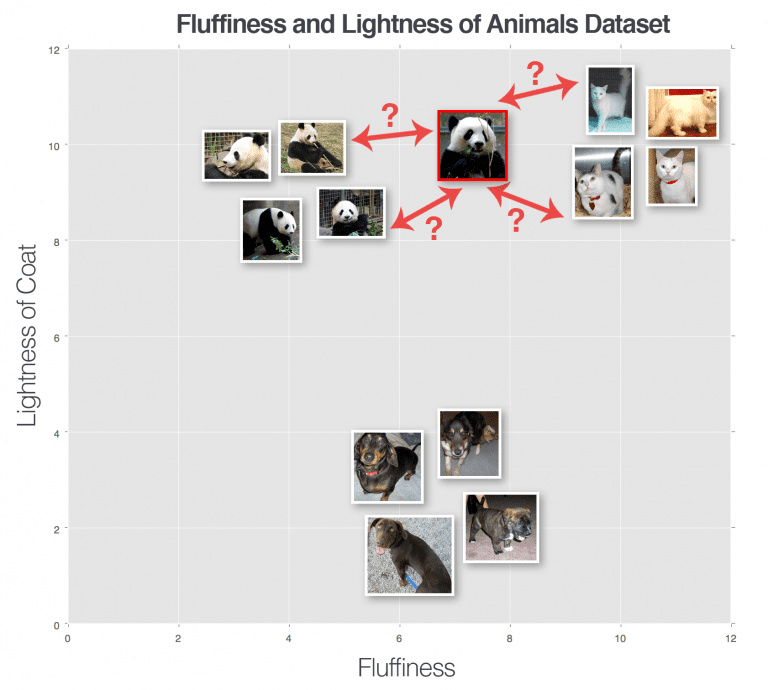

Pada kasus ini akan dilakukan klasifikasi gambar tulisan angka yaitu 0, 1, 2, 3, 4, 5, 6, 7, 8, dan 9

In [ ]:
# Import Library
import pickle, gzip
import numpy as np
import urllib.request

In [ ]:
# Download Dataset
# Download dataset dari dropbox
url = "https://www.dropbox.com/s/d3hz2dli4z6imfl/mnist_1000.pkl.gz?dl=1"
u = urllib.request.urlopen(url)
data = u.read()
u.close()
 
with open('mnist_1000.pkl.gz', "wb") as f :
    f.write(data)

# load dataset
f = gzip.open('/content/mnist_1000.pkl.gz', 'rb')
trainData, trainLabels, valData, valLabels, testData, testLabels = pickle.load(f, encoding='latin1')
f.close()
 
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1000
validation data points: 200
testing data points: 200


In [ ]:
# Lihat label data
print('label datanya : ', np.unique(trainLabels))
print('ukuran matriks tiap datanya : ', trainData[0].shape)

label datanya :  [0 1 2 3 4 5 6 7 8 9]
ukuran matriks tiap datanya :  (784,)


label =  5


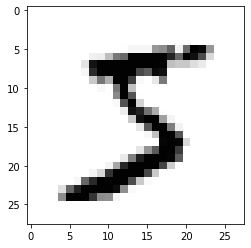

label =  0


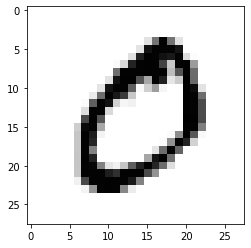

label =  4


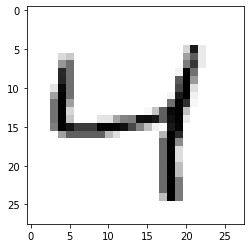

label =  1


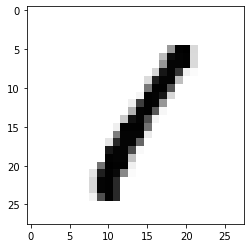

label =  9


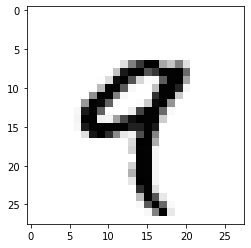

label =  2


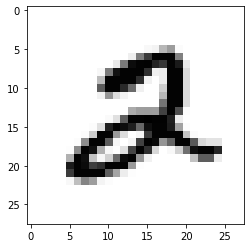

label =  1


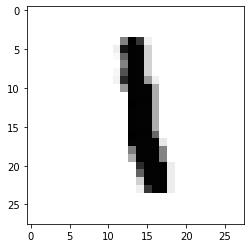

label =  3


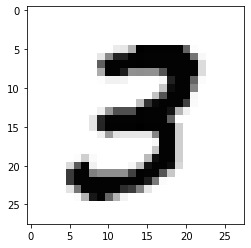

label =  1


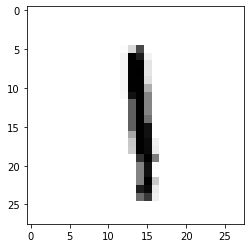

label =  4


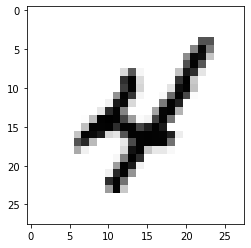

In [ ]:
# Visualisasikan 10 data training pertama:
import matplotlib.pyplot as plt

for i in range(10):
  image = trainData[i].reshape((28,28))
  print('label = ', trainLabels[i])
  plt.imshow(image, cmap="Greys")
  plt.show()

In [ ]:
# Membuat model klasifikasi
# import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Melatih model
for k in [1, 3, 5, 7, 9, 11, 13, 15, 25]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
 
    score = model.score(valData, valLabels)
    print(k, score) 

# melatih ulang classifier menggunakan nilai k terbaik value dan memprediksikan label
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData, trainLabels)
accuracy = model.score(testData, testLabels)
print("\nBest achieved accuracy is %.2f%% on test data" % (accuracy*100))

1 0.88
3 0.88
5 0.86
7 0.845
9 0.85
11 0.835
13 0.815
15 0.81
25 0.795

Best achieved accuracy is 85.50% on test data


In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(testData)
print("Classification Report")
print(classification_report(testLabels, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.80      1.00      0.89        28
           2       0.80      0.75      0.77        16
           3       0.92      0.75      0.83        16
           4       0.95      0.68      0.79        28
           5       0.94      0.85      0.89        20
           6       1.00      0.90      0.95        20
           7       0.88      0.92      0.90        24
           8       1.00      0.70      0.82        10
           9       0.66      0.90      0.76        21

    accuracy                           0.85       200
   macro avg       0.88      0.84      0.85       200
weighted avg       0.87      0.85      0.85       200



## **Object Detection with Haar Cascade**
OpenCV menyediakan (Cascade Classifier )) yang dapat diimplementasikan dengan menggunakan fungsi cv2.CascadeClassifierload.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg \
    -O Potrait.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure si

--2021-12-24 10:37:33--  https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg
Resolving res.klook.com (res.klook.com)... 13.35.118.104, 13.35.118.51, 13.35.118.46, ...
Connecting to res.klook.com (res.klook.com)|13.35.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112296 (110K) [image/jpeg]
Saving to: ‘Potrait.jpg’

Potrait.jpg         100%[===================>] 109.66K  --.-KB/s    in 0.03s   

2021-12-24 10:37:33 (3.08 MB/s) - ‘Potrait.jpg’ saved [112296/112296]

--2021-12-24 10:37:33--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

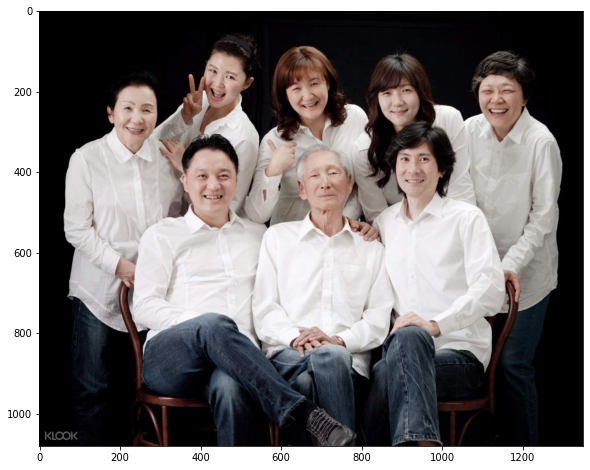

In [ ]:
# Membuka gambar yang akan digunakan
base_image = cv2.imread('Potrait.jpg') # gambar yang digunakan
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY) # convert gambar dari BlueGreenRed ke greyscale
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)) 

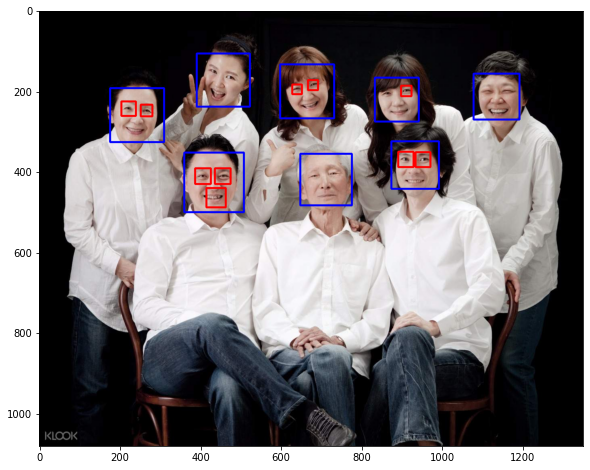

In [ ]:
# Face Detection
# menggunakan haarcascade_frontalface_default.xml untuk mendeteksi wajah di foto
# menggunakan haarcascade_eye.xml untuk mendeteksi mata

test_image = cv2.imread('Potrait.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
eye = eye_cascade.detectMultiScale(grey, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(test_image, (x,y), (x+w, y+h), (255,0,0), 3)

for (x,y,w,h) in eye:
  cv2.rectangle(test_image, (x,y), (x+w, y+h), (0,0,255), 3)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

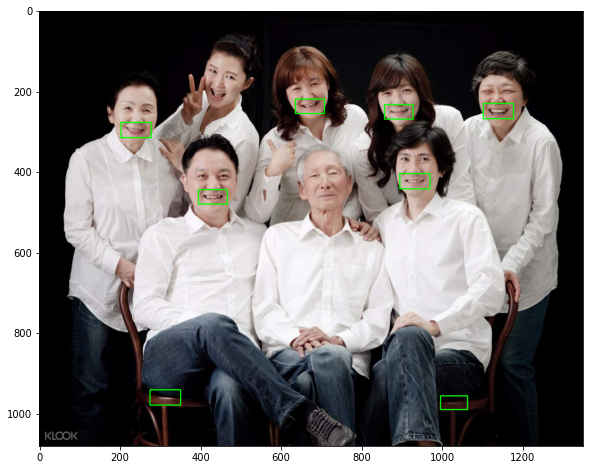

In [ ]:
# Smile Detection
test_image = cv2.imread('Potrait.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)

for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))